In [1]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Willkommen in der Baumschule!   

## Einführung

Entscheidungsbäume sind die Bausteine einer der leistungsstärksten Methoden des **überwachten Lernens** (z. B. mit einer vordefinierten Zielvariablen), die heute verwendet werden. Falls Sie bereits eine Fehlerdiagnose bei einem Gerät, einem Auto oder einem Computer durchführen mussten, ist es gut möglich, dass Sie schon einmal einem Flussdiagramm zur Fehlerbehebung begegnet sind. Flussdiagramme sind visuelle Darstellungen von Entscheidungsbäumen. Zum Beispiel veröffentlicht die Higher School of Economics Informationsdiagramme, um das Leben ihrer MitarbeiterInnen zu erleichtern. Hier ist ein Ausschnitt aus der Anleitung für die Veröffentlichung eines Papers im Portal der Hochschule.
<img src="https://github.com/KI-Campus/AMALEA/blob/master/Woche%203/images/snipped_GER.png?raw=1">

## Klassifizierungs- und Regressionsbäume (CART)

Classification and Regression Trees (Klassifizierungs- und Regressionsbäume) ist ein Akronym, das 1984 von Leo Breiman eingeführt wurde. Es bezeichnet Entscheidungsbaum-Algorithmen, die für prädiktive Modellierungsprobleme verwendet werden können. Wir werden uns in dieser Übung auf den CART-Algorithmus konzentrieren.

### CART

Das CART-Modell wird in Form eines binäreren Entscheidungsbaums dargestellt. Dabei handelt es sich um den gleichen binären Baum, den Sie vielleicht von Algorithmen und Datenstrukturen kennen. Jeder Knoten des Binärbaums kann null, einen oder zwei Kindknoten haben.

Ein Knoten repräsentiert eine einzelne Eingabevariable (X) und einen Aufteilungspunkt (engl. split point) auf dieser Variable (vorausgesetzt, die Variable ist numerisch). Die Blatt- oder Endknoten des Baums enthalten eine Ausgangsvariable (Y), die für eine Vorhersage verwendet wird.

Beim Erstellen eines binären Entscheidungsbaums wird der Eingaberaum aufgeteilt. Dazu wird das sogenannte rekursive binäre Splitting verwendet (greedy Ansatz). Hierbei handelt es sich um ein numerisches Verfahren, bei dem alle Werte aneinandergereiht werden und verschiedene Aufteilungspunkte mit Hilfe einer Kostenfunktion ausprobiert und bewertet werden.

Der Split mit den besten Kosten (niedrigste Kosten, da wir die Kosten minimieren) wird ausgewählt. Alle Eingangsvariablen und alle möglichen Aufteilungspunkte werden ausgewertet und auf Grundlage der Kostenfunktion (greedy) ausgewählt.

- **Regression:** Die Kostenfunktion, die zum Finden der Splitpunkte minimiert wird, ist die **Summe des quadrierten Fehlers** über alle Trainingsstichproben, die in das Rechteck fallen.

- **Klassifizierung:** Es wird die *Gini*-Kostenfunktion verwendet, die einen Hinweis darauf liefert, wie rein die Knoten sind. Die Knotenreinheit bezieht sich dabei darauf, wie gemischt die jedem Knoten zugewiesenen Trainingsdaten sind.

Die Aufteilung wird fortgesetzt, bis die Knoten eine Mindestanzahl von Trainingsbeispielen enthalten oder eine maximale Baumtiefe erreicht ist.

In dieser Aufgabe konzentrieren wir uns nur auf die Klassifizierungseigenschaft des Algorithmus.

### Metriken

#### Gini-Index

Der Gini-Index ist die Kostenfunktion, die zum Bewerten der Aufteilungen des Datensatzes verwendet wird. Eine Aufteilung umfasst ein Eingabeattribut und einen Wert für dieses Attribut. Der Gini-Score gibt eine Vorstellung davon, wie gut eine Aufteilung ist, da er angibt, wie gemischt die Klassen in den beiden Gruppen sind, die durch die Aufteilung entstanden sind. Eine perfekte Aufteilung ergibt einen Gini-Score von 0, während die schlechteste Aufteilung, z. B. eine 50/50-Aufteilung, für ein Zwei-Klassen-Problem einen Gini-Score von 0,5 ergibt.

Die Berechnung des Gini-Scores lässt sich am besten anhand eines Beispiels demonstrieren:

<img src="https://github.com/KI-Campus/AMALEA/blob/master/Woche%203/images/iris_tree.png?raw=1">

Angenommen, Sie finden eine Irisblüte und wollen sie klassifizieren. In der obigen Abbildung beginnen wir im *Wurzelknoten*: Dieser Knoten überprüft, ob die Länge des Blütenblatts kleiner als 2,45 cm ist. Wenn das der Fall ist, gehen wir zum linken Kindknoten der Wurzel hinunter. Dieser Knoten ist ein *Blattknoten*, da er keine Kinder besitzt.

Nehmen wir nun an, wir finden eine weitere Blume. Diese besitzt eine Blütenblattlänge, die größer als 2,45 cm ist. Angefangen bei der Wurzel kommen wir so zum rechten Kindknoten, der kein Blattknoten ist. Dieser Knoten möchte wissen, ob die Breite des Blütenblatts kleiner als 1,75 cm ist. Wenn das der Fall ist, dann ist unsere Blume höchstwahrscheinlich eine Iris-Versicolor. Andernfalls handelt es sich wahrscheinlich um eine Iris-Virginica.

Angenommen, wir haben 100 Trainingsinstanzen mit einer Blütenblattlänge größer als 2,45 cm, darunter 54 mit einer Blütenblattbreite kleiner als 1,75 cm. Das Wertattribut eines Knotens gibt an, auf wie viele Trainingsinstanzen jeder Klasse dieser Knoten zutrifft: Der Knoten unten rechts trifft auf 0 Iris-Setosa, 1 Iris-Versicolor und 45 Iris-Virginica zu. Gemäß Gleichung (\ref{eq1}) setzt sich der Gini-Score wie folgt zusammen: $1-(0/54)^2-(49/54)^2-(5/54)^2 = 0.168$.

\begin{equation*}
G_i = 1 - \sum_{k=0}^{n-1} p_{i,k}^2
\label{eq1}\tag{1}
\end{equation*}
wobei $p_{i,k}$ das Verhältnis der Instanzen der Klasse k unter den Trainingsinstanzen im $i^{th}$-Knoten beschreibt.

## Importe

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

## Entscheidungsbäume mit scikit-learn

Nun haben wir unseren Datensatz für die Algorithmen des maschinellen Lernens vorbereitet. Zu Beginn haben wir die Idee der Klassifizierung und Regression mit Entscheidungsbäumen beschrieben. Im Folgenden werden wir die Implementierung von Entscheidungsbäumen mittels scikit-learn verwenden, um die binäre Klassifizierung des Titanic Datensatzes durchzuführen.


## Entscheidungsbäume ohne Parameteroptimierung (engl. parameter tuning)

#### Importieren der Bibliotheken
Der erste Schritt besteht darin, den Algorithmus "wie er ist" zu verwenden, ohne irgendwelche Parameter anzupassen. Importieren Sie daher die notwendige Bibliothek/Funktion von scikit-learn, die den DecisionTreeClassifier enthält. Außerdem muss die Funktion export_graphviz importiert werden, die für die Darstellung der Ergebnisse der Entscheidungsbäume benötigt wird. Um das Modell zu evaluieren, müssen wir ein Train- und ein Validation-Set erzeugen, indem wir den train-test split von scikit-learn verwenden. Importieren Sie daher die notwendigen Funktionen. Um die Performance der trainierten Entscheidungsbäume zu vergleichen, müssen wir zunächst den DummyClassifier importieren. Der DummyClassifer https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html ist in der Lage, Datenpunkte gleichmäßig zufällig zu klassifizieren oder immer das häufigste Label im Trainingssatz vorherzusagen. Importieren Sie den accuracy score des Pakets 'metrics' für die Evaluierung der Klassifizierungsergebnisse.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.1:</b> Importieren Sie die im Text oben genannten Funktionen.
</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Falls graphviz nicht installiert ist, versuchen Sie folgende Schritte.  
<ul>
<li> 1. Ansatz: Öffnen Sie anaconda, anschließend gehen Sie zu den Umgebungen (engl. environments) und wählen Sie diejenige aus, an der Sie gerade arbeiten. Suchen Sie dann nach graphviz und installieren Sie es.
<li> 2. Ansatz: Öffnen Sie ein Terminal innerhalb Ihrer Umgebung, indem Sie auf den grünen Pfeil Ihrer Umgebung klicken. Anschließend:
<ul>
<li> Aktivieren Sie Ihre Umgebung: conda activate environment_name
    <li> Installieren Sie pip: conda install pip (gegebenfalls bereits installiert)
    <li> installieren Sie graphviz: conda install python-graphviz
    </ul>
</li>

</ul>
<br>

</div>

In [2]:
# STUDENT CODE HERE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# STUDENT CODE until HERE

from graphviz import Source

#### Generieren von Training-, Validierung- und Test-Datensatz


<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.2:</b>
<ul>
<li>Laden Sie die Datensätze aus der Lösung der Vorbereitungsdatei (train_prepared.csv,...).
<li>Nehmen Sie die Spalte mit den Labeldaten sowohl im Trainingsatz als auch im Testsatz und entfernen diese vom Datensatz.
<li>Teilen Sie den "train"-Teil des Datensatzes in 80 % Trainingsdaten und 20 % Validierungsdaten auf. Verwenden Sie den Parameter random_state = 17 für die Reproduzierbarkeit der Ergebnisse.
<li> Hinweis: Sie könnten den originalen Trainigsatz für das Kreuzvalidierungsverfahren (engl. Cross Validation) später benötigen.
</ul>
    
<b>Wichtige Information:</b> Beim überwachten Lernen bestehen die Datensätze immer aus Labels und Features. Nachdem Sie Ihr Modell trainiert haben, geben Sie ihm neue Input Datensätze, die Features (Alter, Geschlecht usw.) enthalten; es gibt das vorhergesagte Label ('Survived') für diese Person zurück.<br>
</div>

In [5]:
# STUDENT CODE HERE
df_train = pd.read_csv('data/train_prepared.csv')
df_test = pd.read_csv('data/test_prepared.csv')

labels_train = df_train.pop('Survived')
labels_test = df_test.pop('Survived')

X_train, X_val, y_train, y_val = train_test_split(
    df_train, labels_train, test_size=0.2, random_state=17)
# STUDENT CODE until HERE

#### Validierung des Dummy Klassifikators

Um einen Eindruck zu bekommen, ob die Klassifizierung mit dem Modell sinnvoll ist, verwenden wir den DummyClassifier, der zufällig entscheidet.  

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.3:</b>
<ul>
<li> Trainieren Sie den Klassifikator mit dem entsprechenden Parameterwert 'most_frequent' für die Strategie
<li> Benutzen Sie den Parameter random_state = 17 (für die Reproduzierbarkeit der Ergebnisse)
<li> Berechnen Sie die Korrektklassifikationsrate (engl. accuracy), um die Klassifizierungsgenauigkeit für die Validierungsdaten zu erhalten
<li> Hinweis: Besuchen Sie die Website von scikit-learn, um den Klassifikator zu importieren, ihn zu trainieren, mit ihm Vorhersagen zu treffen und die Korrektklassifikationsrate zu berechnen
</ul>
</div>

In [6]:
# STUDENT CODE HERE
# DummyClassifier mit der Strategie 'most_frequent' erstellen
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=17)

# Modell auf Trainingsdaten trainieren
dummy_clf.fit(X_train, y_train)

# Vorhersage auf Validierungsdaten
y_pred_dummy = dummy_clf.predict(X_val)

# Accuracy berechnen
accuracy_dummy = accuracy_score(y_val, y_pred_dummy)

# Ausgabe der Accuracy
print(f"Accuracy des DummyClassifier (most_frequent): {accuracy_dummy:.4f}")
# STUDENT CODE until HERE

Accuracy des DummyClassifier (most_frequent): 0.5922


<div class="alert alert-block alert-success">
<b>Frage 3.2.4:</b> Wie interpretieren Sie dieses Ergebnis?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Validierung des Entscheidungsbaums


<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.5:</b>
<ul>
<li> Trainieren Sie einen Entscheidungsbaum (mit DecisionTreeClassifier) mit einer maximalen Tiefe von 2
<li> Evaluieren Sie die Korrektklassifikationsrate Metrik (engl. accuracy metric) anhand der Validierungsdaten.
<li> Benutzen Sie den Parameter random_state = 17 für die Reproduzierbarkeit der Ergebnisse.
<li> Hinweis: Syntax oder Funktionen mit diesem Klassifikator sind für Training etc. gleich.
    </li>
    
</ul>
</div>

In [7]:
# STUDENT CODE HERE
# Entscheidungsbaum mit max. Tiefe von 2 und festem random_state
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=17)

# Modell auf Trainingsdaten trainieren
tree_clf.fit(X_train, y_train)

# Vorhersage auf Validierungsdaten
y_pred_tree = tree_clf.predict(X_val)

# Accuracy berechnen
accuracy_tree = accuracy_score(y_val, y_pred_tree)

# Ausgabe der Accuracy
print(f"Accuracy des DecisionTreeClassifier (max_depth=2): {accuracy_tree:.4f}")
# STUDENT CODE until HERE

Accuracy des DecisionTreeClassifier (max_depth=2): 0.7821


<div class="alert alert-block alert-success">
<b>Frage 3.2.6:</b>  Was können Sie beobachten, wenn wir die Korrektklassifikationsrate mit der des DummyClassifiers vergleichen?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Das trainierte Modell verstehen


<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.7:</b>
<ul>
<li> Plotten Sie den Baum mit sklearn.tree.export_graphviz und graphviz
<li> Geben Sie die Namen der Features sowie die Klassennamen entsprechend dem Datensatz aus.
<li> Hinweis: Benutzen Sie dataframe.columns.values und Source(export_graphviz)
</ul>
</div>

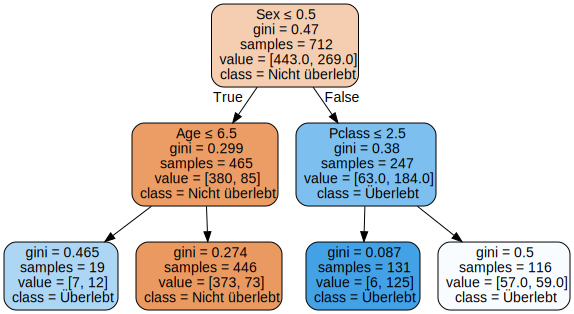

In [8]:
# STUDENT CODE HERE
# Feature-Namen und Klassen-Namen festlegen
feature_names = list(X_train.columns.values)
class_names = ['Nicht überlebt', 'Überlebt']  # 0 = Nicht überlebt, 1 = Überlebt

# Exportiere den Baum als DOT-Datei und visualisiere ihn direkt
dot_data = export_graphviz(
    tree_clf,                       # Das trainierte Modell
    out_file=None,                  # Keine Datei schreiben, direkt als String
    feature_names=feature_names,    # Namen der Eingabe-Features
    class_names=class_names,        # Namen der Zielklassen
    filled=True,                    # Knoten farbig darstellen
    rounded=True,                   # Abgerundete Knoten
    special_characters=True         # Für Umlaute etc.
)

# Baum darstellen
graph = Source(dot_data)
graph
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.2.8:</b>  Welche Features werden für Vorhersagen im erstellten Entscheidungsbaum verwendet? Welche der verbleibenden Splits (in der letzten Zeile des Baums) ist derzeit die Präziseste?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Testen der Generalisierung

In den vorherigen Aufgaben haben wir die Performance unseres Algorithmus an einem einzelnen Train-Test-Split unseres Training-Datensatzes evaluiert. Lassen Sie uns nun die Kreuzvalidierung (engl. cross validation) verwenden, um eine bessere Schätzung des Generalisierungsfehlers zu erhalten.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.9:</b> Importieren Sie die notwendige Bibliothek für die Kreuzvalidierung (engl. cross validation) mit StratifiedKFold.
</div>

In [13]:
# STUDENT CODE HERE
from sklearn.model_selection import StratifiedKFold, cross_val_score
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.10:</b>
<ul>
<li> Führen Sie eine 5-fache geschichtete Kreuzvalidierung (engl. 5-fold stratified cross validation) durch
<li> Berechnen Sie die mittlere Korrektklassifikationsrate (engl. mean accuracy) und die Standardabweichung der Korrektklassifikationsrate (engl. accuracy)
<li> Verwenden Sie eine maximale Tiefe von 2 und random_state = 17 für den Baum und die Folds
<li> Vergessen Sie nicht, den gesamten Trainingssatz zu verwenden (bevor Sie ihn in train,val aufteilen)
</ul>
</div>

In [15]:
# STUDENT CODE HERE
# Entscheidungsbaum mit maximaler Tiefe 2 und festem Zufallszustand
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=17)

# 5-fache geschichtete Kreuzvalidierung mit festem random_state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# Kreuzvalidierung: accuracy als Bewertungsmetrik
scores = cross_val_score(tree_clf, X, y, cv=cv, scoring='accuracy')

# Ausgabe der mittleren Accuracy und Standardabweichung
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standardabweichung der Accuracy: {scores.std():.4f}")
# STUDENT CODE until HERE

NameError: name 'X' is not defined

### Parameteroptimierung für Entscheidungsbäume

Der wichtigste Parameter eines Entscheidungsbaums ist die Tiefe des Baums. Daher ist es notwendig, verschiedene Tiefen des Baums zu evaluieren, um die optimale Leistung hinsichtlich der Korrektklassifikationsrate (engl. classification accuracy) zu erreichen. Zu diesem Zweck verwenden wir die Gittersuche (engl. grid search) in Kombination mit dem Kreuzvalidierungsverfahren (engl. cross validation), das wir zuvor verwendet haben. Glücklicherweise hat scikit-learn bereits eine schöne und einfach zu bedienende Schnittstelle für dieses Problem implementiert. Die Funktion heißt `GridSearchCV` und ist in der Bibliothek sklearn.model_selection zu finden.


#### Verwendung von Grid Search Cross-Validation zur Optimierung der Baumtiefe

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.11:</b>
<ul>
<li> Laden Sie die Bibliothek GridSearchCV und trainieren Sie einen Entscheidungsbaum (DecisionTreeClassifier, random_state = 17)
<li> Ermitteln Sie die optimale maximale Tiefe mit 5-facher geschichteter Kreuzvalidierung (engl. 5-fold stratified cross-validation) und gleichem RandomState
<li> Variieren Sie die Tiefe des Baums zwischen 1 und 13.
<li> Vergessen Sie nicht, den gesamten Trainingssatz zu verwenden (bevor Sie ihn in train,val aufteilen)
<li> Hinweis: Verwenden Sie die scikit-learn-Website für weitere Informationen zu den Funktionen
</ul>
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.12:</b>
<ul>
<li> Zeichnen Sie ein Diagramm zur Darstellung der durchschnittlichen Korrektklassifikationsrate über die Tiefe
<li> Benutzen Sie das Attribut <code>.cv_results</code>, um die durchschnittliche Korrektklassifikationsrate mit Hilfe von 'mean_test_score' zu erhalten.
</ul>
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.2.13:</b>  Was sind die besten Parameterwerte? Wie hoch ist die Korrektklassifikationsrate (Kreuzvaliderungsverfahren) des Modells mit dieser Baumtiefe?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

Für unsere Trainingsdaten haben wir den optimalen Parameter gefunden. Schließlich können wir die Perfomance bewerten, indem wir unsere Trainingsdaten zum Trainieren und unseren Testdatensatz zum Testen verwenden. Verwenden Sie im Folgenden immer eine Baumtiefe von 3.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.14:</b>
<ul>
<li> Trainieren Sie einen Entscheidungsbaum bei einer Baumtiefe von drei, unter Verwendung aller Trainingsdaten (keine Kreuzvalidierung)
<li> Berechnen Sie die Korrektklassifikationsrate (engl. accuracy) für den Testdatensatz. Verwenden Sie den Parameter random_state = 17 für die Reproduzierbarkeit.
</ul>
</div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
dot_data = export_graphviz(
    decision_tree, out_file=None, feature_names=x_train.columns.values, class_names=['Dead','Survived'],  filled=True,
    rounded=True, special_characters=True
)
graph = Source(dot_data)
graph

#### Vergleich von Ergebnissen mit der nicht optimierten Version

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.15:</b> Bestimmen Sie die Wirkung von GridSearchCV
<ul>
<li> Benutzen Sie folgenden Ausdruck: (acc2 - acc1) / acc1 * 100%
<li> acc1 und acc2 sind die Korrektklassifikationsrate (engl. accuracies) der Kreuzvalidierung vor und nach der Optimierung von max_depth mit GridSearchCV
<li> Hinweis: acc1 wurde bereits vor der Optimierung verwendet, berechnen Sie daher acc2 zum Vergleich
<li> Geben Sie die Verbesserung (berechnet durch den Ausdruck) und die mittlere Korrektklassifikationsrate (engl. accuracy) des optimierten dec_tree aus. Verwenden Sie eine Baumtiefe von 3 und einen random_state = 17 für die Reproduzierbarkeit.
</ul>
</div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.2.16:</b> Was sind die Vorteile des "grid search" - Verfahrens?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Einfluss der Skalierung

Als letzten Schritt wollen wir den Einfluss unterschiedlicher Skalierungen auf unsere Trainingsdaten auswerten.

##### Skalieren der Datensätze mit Standard Scaler und MinMaxScaler


<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.17:</b>

Laden Sie die in sklearn.preprocessing enthaltenen Funktionen für den StandardScaler und den MinMaxScaler.

</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.18:</b> Bereiten Sie zwei verschiedene Datensätze vor, einen skaliert mit StandardScaler und den anderen mit MinMaxScaler.
<ul>
<li> Erstellen Sie die entsprechenden Skalierer und verwenden Sie die Methode <code>.fit_transform()</code> unter Verwendung des gesamten Trainingsdatensatzes
<li> Transformieren Sie dann den Testdatensatz mit den angepassten Skalern mithilfe der Funktion transform
    
</ul>
</div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

#### Evaluieren Sie die Leistung der skalierten Datensätze



<div class="alert alert-block alert-success">
<b>Aufgabe 3.2.19:</b> Trainieren Sie nun ein weiteres Entscheidungsbaummodell mit jedem der neu skalierten Datensätze (DecisionTreeClassifier, random_state = 17)
<ul>
<li> Berechnen Sie die Korrektklassifikationsrate des Testdatensatzes für beide Datensätze
<li> Verwenden Sie eine maximale Tiefe von 3 für den Trainingsprozess

</ul>
</div>



In [ ]:
# Standard Scaler dataset
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# MinMax Scaler dataset
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.2.20:</b> Vergleichen Sie die Korrektklassifikationsrate (engl. accuracy) der Ergebnisse beider Skalierungsoptionen mit der ursprünglichen (ohne skalierte Datensätze) Leistung bei einer Baumtiefe von drei. Was stellen Sie fest? Warum entspricht dieses Ergebnis nicht den Erwartungen? (Vergleichen Sie es nicht mit dem Ergebnis der Kreuzvalidierung) Empfehlen Sie, die Skalierung generell anzuwenden?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### RandomForests mit scikit-learn

Wir verwenden nicht nur einen Entscheidungsbaum, sondern mehrere. Dadurch berücksichtigen wir Ausgaben mehrere Klassifikatoren als nur eine einzige (Ensemble-Methode - in diesem Fall Bagging). RandomForest-Klassifikatoren sind weniger anfällig für Overfit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

random_forest = RandomForestClassifier(random_state=17)
fold = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

scores = cross_val_score(random_forest, X_train, Y_train, cv=fold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Fast so gut wie unser optimierter Entscheidungsbaum und besser als unsere nicht optimierte Version, da nur die Standardwerte von RandomForestClassifiers verwendet und nicht optimiert werden. Sie sollten dieses Werkzeug des maschinellen Lernens im Hinterkopf behalten.